# Basic classification: Classify images of clothing

https://www.tensorflow.org/tutorials/keras/classification


In [142]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.17.0


# Load Data

In [143]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()



In [144]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [145]:
train_images.shape

(60000, 28, 28)

In [146]:
len(train_labels)

60000

In [147]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [148]:
test_images.shape

(10000, 28, 28)

In [149]:
len(test_labels)

10000

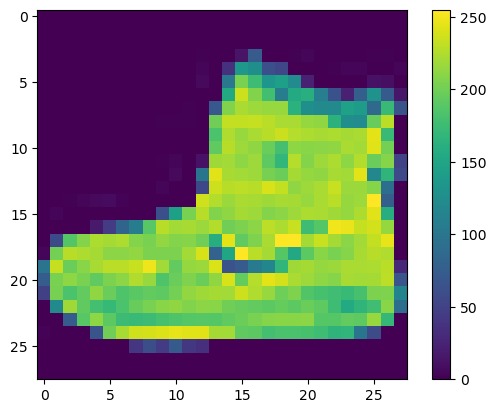

In [150]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [151]:
train_images = train_images / 255.0
test_images = test_images / 255.0

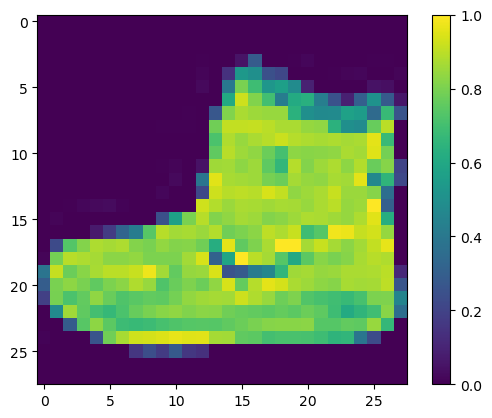

In [152]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

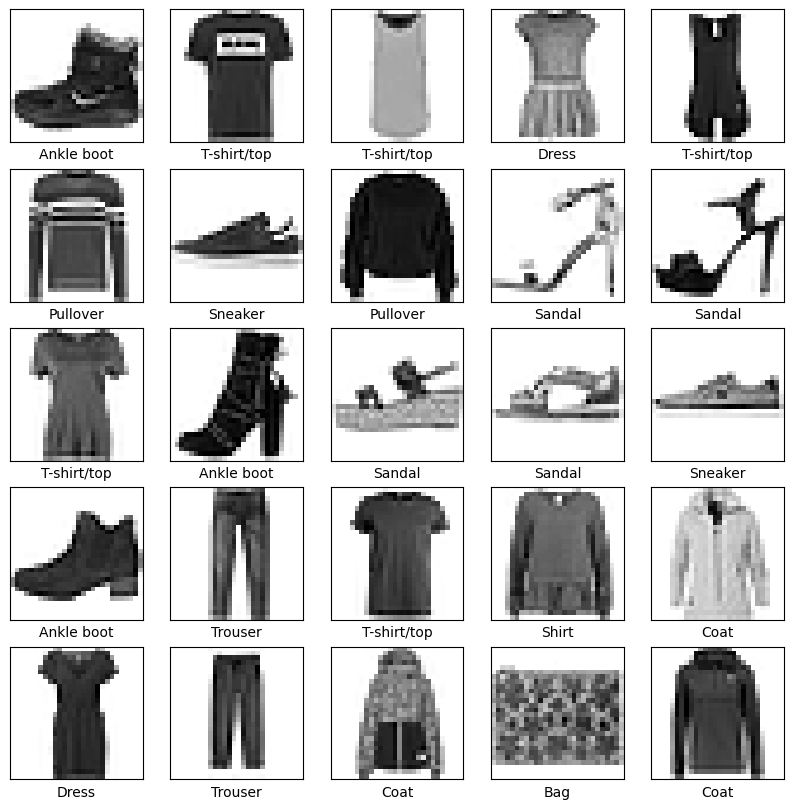

In [153]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [154]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

# Compile the model
Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

- **Optimizer** — This is how the model is updated based on the data it sees and its loss function.
- **Loss functi**on — his measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
- **Metrics** — Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

**Loss Function's Role:**
The loss function tells the model "you're wrong, and by this much."

**Optimizer's Role:**
The optimizer takes that "wrongness" information and decides how to change the model's settings to be less wrong next time. It's like a set of rules that guide the model towards better predictions.

**How it Works:**
The optimizer uses techniques like "gradient descent" to figure out which direction to adjust the weights to reduce the loss. Different optimizers have different strategies for making these adjustments, which can affect how quickly and effectively the model learns.

**Analogy:**
Imagine you're adjusting the knobs on a radio to find the clearest signal. The loss function tells you how fuzzy the signal is. The optimizer tells you which way to turn the knobs to make it clearer.

In essence, the optimizer works in conjunction with the loss function to train the model, by taking the error information, and using it to adjust the models parameters.

In [155]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train Model

In [156]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 790us/step - accuracy: 0.7832 - loss: 0.6324
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 754us/step - accuracy: 0.8620 - loss: 0.3828
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 773us/step - accuracy: 0.8763 - loss: 0.3393
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 740us/step - accuracy: 0.8879 - loss: 0.3098
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 737us/step - accuracy: 0.8914 - loss: 0.2925
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 760us/step - accuracy: 0.8964 - loss: 0.2810
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 766us/step - accuracy: 0.8996 - loss: 0.2719
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 780us/step - accuracy: 0.9054 - loss: 0.2567
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 767us/step - accuracy: 0.9085 - loss: 0.2411
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 778us/step - accuracy: 0.9106 - loss: 0.2400


In [157]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest Accuracy:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.8806 - loss: 0.3344

Test Accuracy: 0.8805999755859375


In [158]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [159]:
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step


In [160]:
predictions_2 = probability_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step


In [161]:
predictions[0]

array([-12.258445  , -13.559638  , -14.16283   , -17.391352  ,
       -13.801079  ,  -4.922374  ,  -9.926756  ,  -0.04104099,
       -10.633034  ,   4.870701  ], dtype=float32)

In [162]:
predictions_2[0]

array([3.6115804e-08, 9.8309663e-09, 5.3781579e-09, 2.1306128e-10,
       7.7221856e-09, 5.5425910e-05, 3.7182389e-07, 7.3054801e-03,
       1.8348676e-07, 9.9263847e-01], dtype=float32)

In [163]:
np.argmax(predictions_2[0])

9

In [164]:
test_labels[0]

9

In [165]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

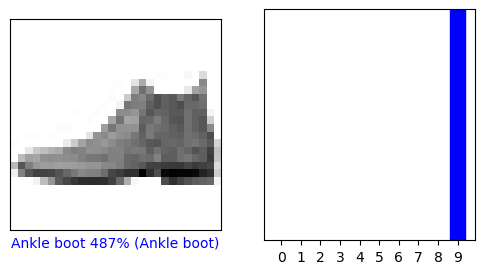

In [166]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

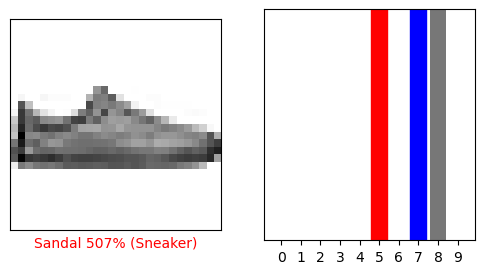

In [167]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

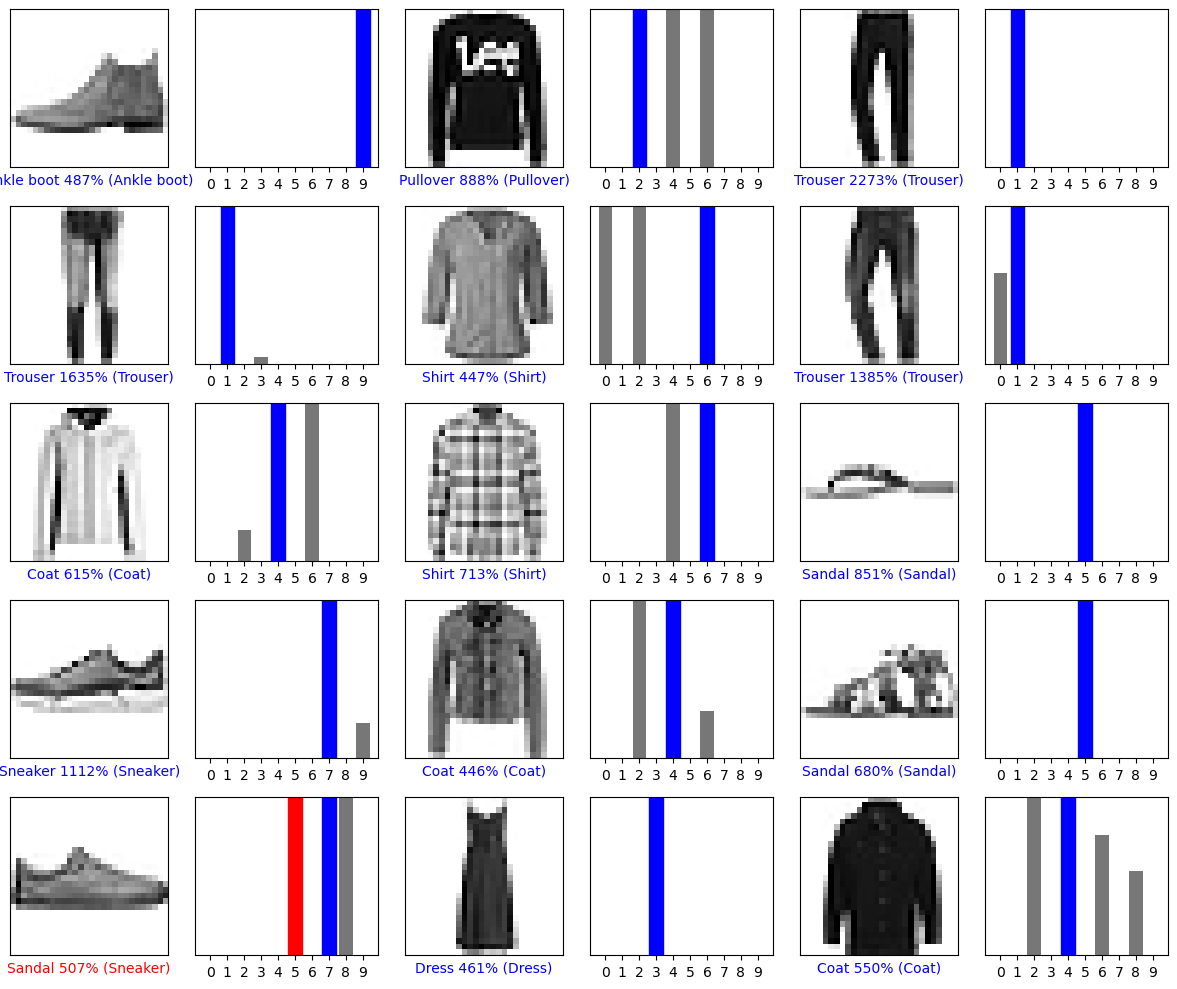

In [168]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()